# PROJECT ONE

PROJECT PARTICIPANTS:  Kashifa AHMED, Charles CAMPISI, Carol PIETRO, and Ian VALENTIK

## TED TALKS:  TEEN Tobacco / Nicotine Usage Trends

WE WONDERED:
Is there a significant increase in teen e-cigarette usage?
TED Talk stated a 900% increase in E-cigarette usage since 2011, can we measure that increase? 
Are their any differences in gender and ethnicity in the percentage of E-cigarette users?

###### DEPENDENCIES

In [1]:
# Include this line to make plots interactive
%matplotlib notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')
import requests 
import json
import pandas as pd
import numpy as np
from scipy import stats
from sodapy import Socrata
import matplotlib.pyplot as plt
%matplotlib inline
import gmaps
from pandas.io.json import json_normalize

#set ggplot style
plt.style.use('ggplot')

###### API CALL

In [3]:
#Our data comes from the CDC. It is a Survey completed Biennally regarding Teen tobacco usage. Data covers from 1993 - 2017 
client = Socrata("chronicdata.cdc.gov", None)
url = "https://chronicdata.cdc.gov/resource/rb39-ixr6.json"
results = client.get("rb39-ixr6", limit=38708)

In [4]:
# Validation of results
#results

In [5]:
# To print the URL
#print(requests.get(url))

In [6]:
# To print the URL
#print(requests.get(url).json())

In [7]:
# dump of the data 
#marked out due to API stuff discussed with Brent
#response = requests.get(url).json()
#print(json.dumps(response, indent = 4, sort_keys=True))

###### REVIEW OF DATA FRAME AND BEGINNING OF ANALYSIS

In [8]:
# Define the data frame to begin review of data
health_df = pd.DataFrame(results)
health_df.count()

:@computed_region_bxsw_vy29    37220
:@computed_region_he4y_prf8    37750
age                            38708
data_value                     24275
data_value_footnote            14433
data_value_footnote_symbol     14433
data_value_std_err             24275
data_value_type                38708
data_value_unit                38708
datasource                     38708
displayorder                   38708
education                      38708
gender                         38708
geolocation                    38708
high_confidence_limit          24275
locationabbr                   38708
locationdesc                   38708
low_confidence_limit           24275
measuredesc                    38708
measureid                      38708
race                           38708
response                       38708
sample_size                    24275
stratificationid1              38708
stratificationid2              38708
stratificationid3              38708
stratificationid4              38708
s

In [9]:
#Collecting a list of all columns within the DataFrame/
health_df.columns

Index([':@computed_region_bxsw_vy29', ':@computed_region_he4y_prf8', 'age',
       'data_value', 'data_value_footnote', 'data_value_footnote_symbol',
       'data_value_std_err', 'data_value_type', 'data_value_unit',
       'datasource', 'displayorder', 'education', 'gender', 'geolocation',
       'high_confidence_limit', 'locationabbr', 'locationdesc',
       'low_confidence_limit', 'measuredesc', 'measureid', 'race', 'response',
       'sample_size', 'stratificationid1', 'stratificationid2',
       'stratificationid3', 'stratificationid4', 'submeasure', 'submeasureid',
       'topicdesc', 'topicid', 'topictype', 'topictypeid', 'year'],
      dtype='object')

In [10]:
#Reorganizing the columns using double brackets
organized_df = health_df[["locationabbr","year","locationdesc","topicdesc","measuredesc","submeasure","data_value","sample_size","gender","age","race","response","education", "geolocation"]]
organized_df.head()

,locationabbr,year,locationdesc,topicdesc,measuredesc,submeasure,data_value,sample_size,gender,age,race,response,education,geolocation
0,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,Ever,High School,"{'type': 'Point', 'coordinates': [-98.20078122..."
1,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
2,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-75.57774116..."
3,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
4,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."


##### We Learned: Changing header names helped but we had to change them again, when we discovered confusion among team members

In [11]:
# Renaming column headers to assist in clarity
renamed_df = organized_df.rename(columns={"locationabbr":"Location Code","year":"Year","locationdesc":"State","topicdesc":"Use Type","measuredesc":"Status","submeasure":"Frequency","data_value":"% of Users","sample_size":"Sample Size","gender":"Gender","age":"Age","race":"Race","response":"User Status","education":"Education"})
renamed_df.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
0,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,Ever,High School,"{'type': 'Point', 'coordinates': [-98.20078122..."
1,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
2,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-75.57774116..."
3,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
4,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."


In [12]:
# Creating matching data to the dataset used in TED talk/ US data only used 
Minus_Nat= renamed_df.loc[renamed_df["State"] !="National (States and DC)"]
Minus_PR = Minus_Nat.loc[Minus_Nat["State"] !="Puerto Rico"]
Minus_NatPRGuam = Minus_PR.loc[Minus_PR["State"] !="Guam"]
Minus_NatPRGuam.head()
#Minus_Ohio['C'] = np.arange(len(Minus_Ohio))
#print (Minus_Ohio)

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
0,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,Ever,High School,"{'type': 'Point', 'coordinates': [-98.20078122..."
1,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
2,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-75.57774116..."
3,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
4,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."


In [13]:
#cleansing data, dropping values not needed for our study
USA=Minus_NatPRGuam.dropna(how='any')
USA.head()
#USA.count()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
0,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,Ever,High School,"{'type': 'Point', 'coordinates': [-98.20078122..."
1,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
2,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-75.57774116..."
3,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."
4,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-108.1098303..."


#### We Learned:  Getting our data set to match the overall variables used in our comparison was not as easy as it originally seemed

In [14]:
# changing the percentage of users data to a usable integer float type 
USA[['% of Users']]=USA[['% of Users']].astype(float)

In [15]:
# Counts of states reporting for each year. To see any variance in reporting
USA_StateCount = USA.groupby('Year')['State'].nunique()
USA_StateCount

Year
1993    19
1995    21
1997    24
1999    20
2001    24
2003    32
2005    40
2007    41
2009    42
2011    43
2013    44
2015    38
2017    40
Name: State, dtype: int64

In [16]:
# counts by use type validates number of reporting states 
USA_UseType_Count = USA.groupby('Use Type')['State'].nunique()
USA_UseType_Count

Use Type
Any Tobacco Use (Youth)          39
Cigar Use (Youth)                46
Cigarette Use (Youth)            48
E-Cigarette Use (Youth)          44
Smokeless Tobacco Use (Youth)    48
Name: State, dtype: int64

In [17]:
#Average percetage of users by year
USA_UsePercentage = USA.groupby('Year')['% of Users'].mean()
USA_UsePercentage

Year
1993    36.571579
1995    26.289634
1997    26.544444
1999    20.654296
2001    16.436196
2003    15.319567
2005    15.557080
2007    13.596225
2009    12.454654
2011    11.314208
2013     9.365586
2015    12.821463
2017     9.906269
Name: % of Users, dtype: float64

In [18]:
# average use type by year
USA.groupby(['Year','Use Type']).mean()

% of Users
Year Use Type                                 
1993 Cigarette Use (Youth)           36.571579
1995 Cigarette Use (Youth)           37.818543
     Smokeless Tobacco Use (Youth)    7.964737
1997 Cigarette Use (Youth)           40.188418
     Smokeless Tobacco Use (Youth)    6.419583
1999 Cigar Use (Youth)                8.987391
     Cigarette Use (Youth)           37.033705
     Smokeless Tobacco Use (Youth)    5.715888
2001 Cigar Use (Youth)                7.182986
     Cigarette Use (Youth)           29.083162
     Smokeless Tobacco Use (Youth)    5.091558
2003 Cigar Use (Youth)                6.960541
     Cigarette Use (Youth)           27.418719
     Smokeless Tobacco Use (Youth)    4.788670
2005 Cigar Use (Youth)                7.934974
     Cigarette Use (Youth)           25.548877
     Smokeless Tobacco Use (Youth)    5.510000
2007 Cigar Use (Youth)                6.962295
     Cigarette Use (Youth)           22.263363
     Smokeless Tobacco Use (Youth)    5.301095
2009 Cigar Use (Youth)                7.325085
     Cigarette Use (Youth)           20.236209
     Smokeless Tobacco Use (Youth)    5.496176
2011 Cigar Use (Youth)                6.521044
     Cigarette Use (Youth)           18.236758
     Smokeless Tobacco Use (Youth)    5.149143
2013 Cigar Use (Youth)                5.983978
     Cigarette Use (Youth)           14.545278
     Smokeless Tobacco Use (Youth)    4.888743
2015 Any Tobacco Use (Youth)         27.956631
     Cigar Use (Youth)                5.226997
     Cigarette Use (Youth)           12.529388
     E-Cigarette Use (Youth)         18.820471
     Smokeless Tobacco Use (Youth)    4.695000
2017 Any Tobacco Use (Youth)         18.160069
     Cigar Use (Youth)                3.902896
     Cigarette Use (Youth)            9.261398
     E-Cigarette Use (Youth)         15.754225
     Smokeless Tobacco Use (Youth)    3.351613

### VISUAL 1: Percentage of Users by Gender Over Time

In [19]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
grouped_usa_df = USA.groupby(['Year','Gender']).mean()

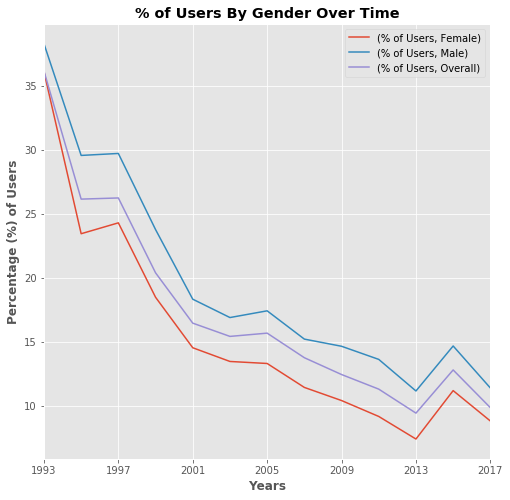

In [20]:
# Use unstack() to Plot all users response as a line chart
fig, ax = plt.subplots(figsize=(8,8))
grouped_usa_df.unstack().plot(ax=ax)
plt.title("% of Users By Gender Over Time", weight = 'bold')
plt.xlabel("Years", weight = 'bold')
plt.ylabel("Percentage (%) of Users", weight = 'bold')
leg = ax.legend()


### VISUAL 2: Percentage of E-Cigarette Users by Gender Over Time

In [21]:
#Forming DataFrame for Just E-Cigarette User Responses over USA
USA_eCig=USA.loc[USA["Use Type"] ==("E-Cigarette Use (Youth)")]
USA_eCig.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
41,NC,2015,North Carolina,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,63.0,429,Overall,All Ages,Multiple Race,Ever,High School,"{'type': 'Point', 'coordinates': [-79.15925046..."
61,FL,2015,Florida,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.9,5752,Overall,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-81.92896053..."
89,NY,2015,New York,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,4.8,2095,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
107,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,7.4,362,Overall,All Ages,African American,Ever,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."
133,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,0.8,365,Overall,All Ages,African American,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."


In [22]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
USA_eCig_Avg = USA_eCig.groupby(['Year','Gender']).mean()
USA_eCig_Avg.head()

% of Users
Year Gender             
2015 Female    17.653285
     Male      20.639416
     Overall   18.693457
2017 Female    14.561842
     Male      17.178947

#### We Learned:  That we could not find a consistent trend upward in E-Cigarette use, in the data we had available.

In [23]:
# Finding Average & Using GroupBy in order to separate the data into fields according to "Year and "Gender" values
USA_eCig_Avg = USA_eCig.groupby(['Year','Gender']).mean()

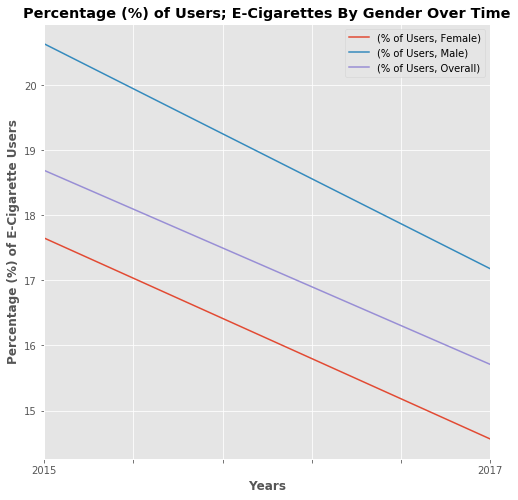

In [24]:
# Use unstack() to Plot the E-Cigarette users response as a line chart
fig, ax = plt.subplots(figsize=(8,8))
USA_eCig_Avg.unstack().plot(ax=ax)
plt.title("Percentage (%) of Users; E-Cigarettes By Gender Over Time", weight = 'bold')
plt.xlabel("Years", weight = 'bold')
plt.ylabel("Percentage (%) of E-Cigarette Users", weight = 'bold')
leg = ax.legend()


### VISUAL 3: Percentage of Users by Ethnicity Over Time

In [25]:
# grouping the ethnicity by year
Grouped_USA_Ethinicity = USA.groupby(['Year','Race']).mean()

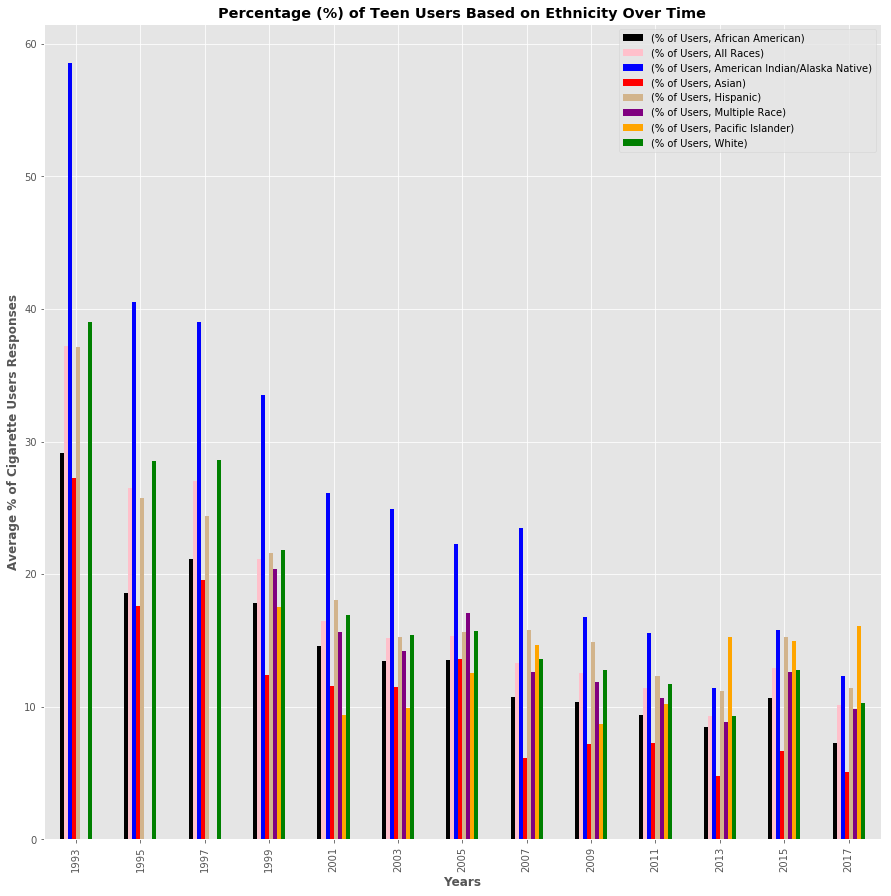

In [26]:
# Creating a LINE graph of ethnicity usage stats
fig, ax = plt.subplots(figsize=(15,15))
colors = ["black","pink","blue","red","tan","purple","orange","green"]
Grouped_USA_Ethinicity.unstack().plot.bar(ax=ax, color=colors)
plt.title("Percentage (%) of Teen Users Based on Ethnicity Over Time", weight = 'bold')
plt.xlabel("Years", weight = 'bold')
plt.ylabel("Average % of Cigarette Users Responses", weight = 'bold')
leg = ax.legend()

#### We Learned:  Although we enjoyed making all these graphs, many just didn't provide us with valuable information towards answering our questions.

### VISUAL 4: Percentage of E-Cigarette Users by Ethnicity Over Time

In [27]:
# Grouping the ethnicity by year specific to E-Cig use
USA_eCig_Etinicity = USA_eCig.groupby(['Year','Race']).mean()

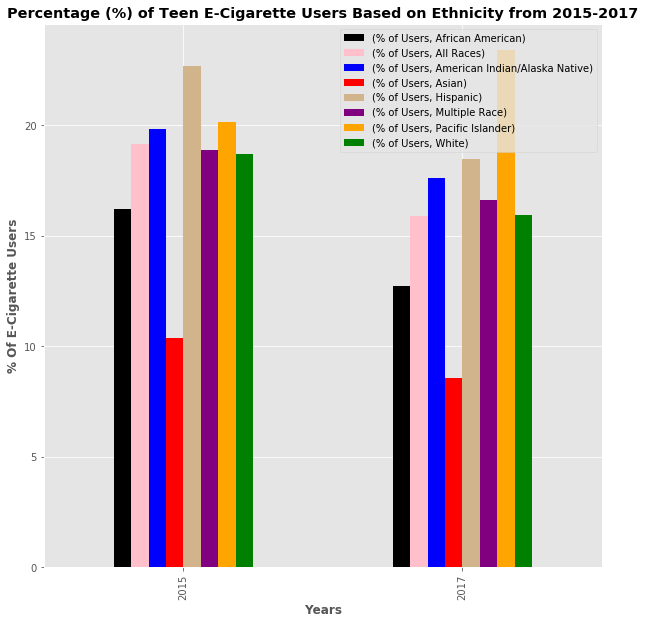

In [28]:
# Line graph of E-cig use only by ethnicity
fig, ax = plt.subplots(figsize=(10,10))
colors = ["black","pink","blue","red","tan","purple","orange","green"]
USA_eCig_Etinicity.unstack().plot.bar(ax=ax, color= colors)
plt.title("Percentage (%) of Teen E-Cigarette Users Based on Ethnicity from 2015-2017", weight = 'bold')
plt.xlabel("Years", weight = 'bold')
plt.ylabel("% Of E-Cigarette Users", weight = 'bold')
leg = ax.legend()

### VISUAL 5: Percentage of Users by Use Status Over Time (Current, Ever, Frequent)

In [29]:
# grouping the data by year and user status
grouped_usa_User_Status = USA.groupby(['Year','User Status']).mean()

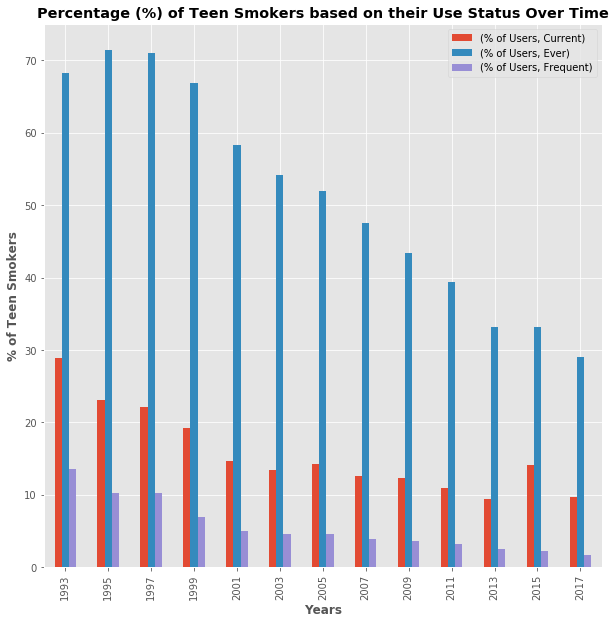

In [30]:
# graphing of % of users over time 
fig, ax = plt.subplots(figsize=(10,10))
grouped_usa_User_Status.unstack().plot.bar(ax=ax)
plt.title("Percentage (%) of Teen Smokers based on their Use Status Over Time", weight = 'bold')
plt.xlabel("Years", weight = 'bold')
plt.ylabel("% of Teen Smokers", weight = 'bold')
leg = ax.legend()

### VISUAL 6: Percentage of E-Cigarette Users by Use Status Over Time (Current, Ever, Frequent)

In [31]:
# grouping for e-cig use only
E_Cig_grouped_usa_User_Status = USA_eCig.groupby(['Year','User Status']).mean()

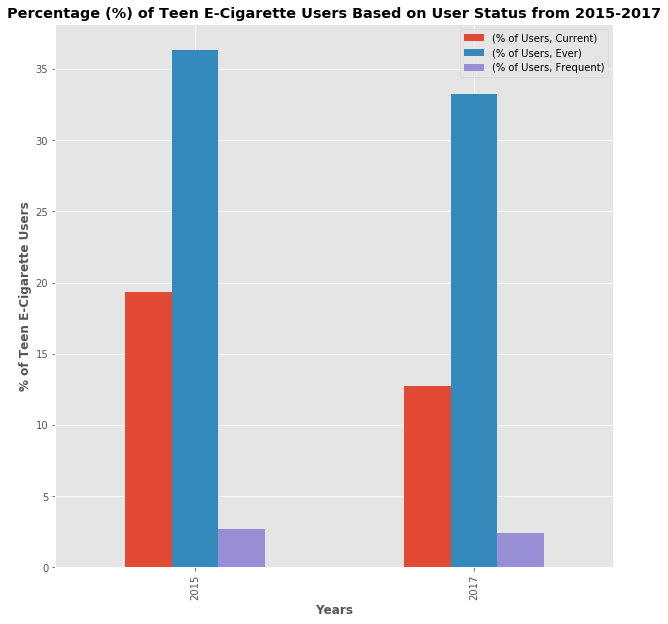

In [32]:
# graphing of % of users over time for e-cig only
fig, ax = plt.subplots(figsize=(10,10))
E_Cig_grouped_usa_User_Status.unstack().plot.bar(ax=ax)
plt.title("Percentage (%) of Teen E-Cigarette Users Based on User Status from 2015-2017", weight = 'bold')
plt.xlabel("Years", weight = 'bold')
plt.ylabel("% of Teen E-Cigarette Users", weight = 'bold')
leg = ax.legend()

### VISUAL 7: Percentage of  E-cigarette Users by All Use Type (2015 - 2017)

In [33]:
#Forming DataFrame for Just E-Cigarette User Responses over USA
USA_Use_type_grp=USA.groupby(['Year','Use Type']).mean()
USA_Use_type_grp.head()

% of Users
Year Use Type                                 
1993 Cigarette Use (Youth)           36.571579
1995 Cigarette Use (Youth)           37.818543
     Smokeless Tobacco Use (Youth)    7.964737
1997 Cigarette Use (Youth)           40.188418
     Smokeless Tobacco Use (Youth)    6.419583

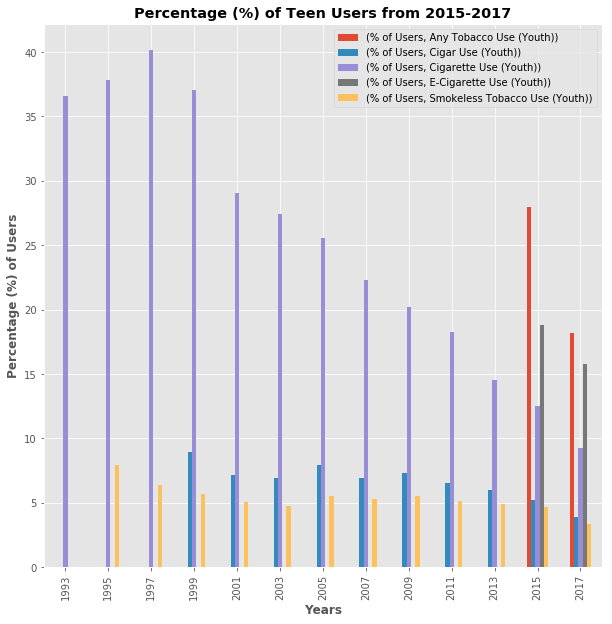

In [34]:
# GRAPH
fig, ax = plt.subplots(figsize=(10,10))
USA_Use_type_grp.unstack().plot.bar(ax=ax)
plt.title("Percentage (%) of Teen Users from 2015-2017", weight = 'bold')
plt.xlabel("Years", weight = 'bold')
plt.ylabel("Percentage (%) of Users", weight = 'bold')
leg = ax.legend()

#### We Learned:  That sometimes graphs showed us what we already suspected, that changes in variables monitored over time added noise to our data making comparisons difficult

###### Reframing of Data for Additional Analysis

In [35]:
# redefining qualitative value of users
Avg_USA=USA[['% of Users']]=USA[['% of Users']].astype(float)

In [36]:
# Reframing data 
National= renamed_df.loc[renamed_df["State"] =="National (States and DC)"]
National.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
20991,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.8,7389,Female,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21054,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0.4,638,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21076,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,3.5,2737,Overall,All Ages,African American,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21120,US,2017,National (States and DC),Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,1.1,3536,Overall,All Ages,Hispanic,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21166,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,0.3,633,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [37]:
# Dropping null values - Survey had values listed as null for those of statistical insignificance in the response value.
no_null_National =National.dropna(how='any')
no_null_National.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
20991,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.8,7389,Female,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21054,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0.4,638,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21076,US,2017,National (States and DC),Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,3.5,2737,Overall,All Ages,African American,Current,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21120,US,2017,National (States and DC),Cigar Use (Youth),Smoking Status,Frequent Cigar Smoker,1.1,3536,Overall,All Ages,Hispanic,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."
21166,US,2017,National (States and DC),Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,0.3,633,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-95.712891, ..."


In [38]:
# Reframing for Ohio data only (Originally to compare Ohio e-use to US e-use, but No Ohio reporting on e-use!)
Ohio_df= renamed_df.loc[renamed_df["State"] =="Ohio"]
Ohio_df.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
8,OH,2013,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,NaN,NaN,Overall,All Ages,Asian,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
23,OH,2011,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,NaN,NaN,Overall,All Ages,Multiple Race,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
49,OH,2007,Ohio,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,9.8,2498,Overall,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
99,OH,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,40.7,358,Overall,All Ages,African American,Ever,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
142,OH,2013,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,3.2,329,Overall,All Ages,African American,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [39]:
#removal of null values for Ohio
no_null_OH =Ohio_df.dropna(how='any')
no_null_OH.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
49,OH,2007,Ohio,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,9.8,2498,Overall,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
99,OH,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,40.7,358,Overall,All Ages,African American,Ever,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
142,OH,2013,Ohio,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,3.2,329,Overall,All Ages,African American,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
224,OH,2011,Ohio,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,50.3,667,Female,All Ages,All Races,Ever,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."
460,OH,2011,Ohio,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,0,375,Overall,All Ages,African American,Frequent,High School,"{'type': 'Point', 'coordinates': [-82.40426005..."


In [40]:
#validating variable types
no_null_National.dtypes

Location Code    object
Year             object
State            object
Use Type         object
Status           object
Frequency        object
% of Users       object
Sample Size      object
Gender           object
Age              object
Race             object
User Status      object
Education        object
geolocation      object
dtype: object

In [41]:
#no_null_State.t0 float
no_null_National[['% of Users']]=no_null_National[['% of Users']].astype(float)

In [42]:
#redifining percentage as float for no-null ohio
no_null_OH[['% of Users']]=no_null_OH[['% of Users']].astype(float)

In [43]:
# validating type
no_null_OH.dtypes

Location Code     object
Year              object
State             object
Use Type          object
Status            object
Frequency         object
% of Users       float64
Sample Size       object
Gender            object
Age               object
Race              object
User Status       object
Education         object
geolocation       object
dtype: object

In [44]:
# validating types
no_null_National.dtypes

Location Code     object
Year              object
State             object
Use Type          object
Status            object
Frequency         object
% of Users       float64
Sample Size       object
Gender            object
Age               object
Race              object
User Status       object
Education         object
geolocation       object
dtype: object

In [45]:
# Using GroupBy in order to separate the data into fields according to "state" values
grouped_OH_df = no_null_OH.groupby(['Location Code','Year','Use Type','Status','Frequency','Gender','Age','Race','Education'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_OH_df)

In [46]:
# Grouping for comparison of OHIO to US - later discovered no reporting values for e-cig use meant we didn't use. 
grouped_OH_comparison = grouped_OH_df.mean()
grouped_OH_comparison

% of Users
Location Code Year Use Type                      Status         Frequency                       Gender  Age      Race             Education              
OH            1993 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School        29.0
                                                                                                Male    All Ages All Races        High School        30.4
                                                                                                Overall All Ages African American High School        14.2
                                                                                                                 All Races        High School        29.7
                                                                                                                 White            High School        32.8
                                                                Ever Cigarette Smoker           Female  All Ages All Races        High School        66.0
                                                                                                Male    All Ages All Races        High School        71.0
                                                                                                Overall All Ages African American High School        65.1
                                                                                                                 All Races        High School        68.6
                                                                                                                 White            High School        68.8
                                                                Frequent Cigarette Smoker       Female  All Ages All Races        High School        12.3
                                                                                                Male    All Ages All Races        High School        16.1
                                                                                                Overall All Ages African American High School         3.3
                                                                                                                 All Races        High School        14.3
                                                                                                                 White            High School        16.6
              1997 Cigarette Use (Youth)         Smoking Status Current Cigarette Smoker        Female  All Ages All Races        High School        32.0
                                                                                                Male    All Ages All Races        High School        36.9
                                                                                                Overall All Ages African American High School        19.6
                                                                                                                 All Races        High School        34.5
                                                                                                                 White            High School        38.1
                                                                Ever Cigarette Smoker           Female  All Ages All Races        High School        67.8
                                                                                                Male    All Ages All Races        High School        70.5
                                                                                                Overall All Ages African American High School        67.3
                                                                                                                 All Races        High School        69.2
                                                                                                                 White            High Scho

In [47]:
# Regrouping of data for Lat / long values for heat maps
latlon = (pd.concat({i: json_normalize(x) for i, x in USA.pop('geolocation').items()})
         .reset_index(level=1, drop=True)
         .join(USA)
         .reset_index(drop=True))
latlon.head()

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education
0,"[-98.200781227, 38.3477403]",Point,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,Ever,High School
1,"[-108.109830353, 43.235541343]",Point,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,Current,High School
2,"[-75.577741168, 39.008830667]",Point,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Current,Middle School
3,"[-108.109830353, 43.235541343]",Point,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,Frequent,High School
4,"[-108.109830353, 43.235541343]",Point,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,Frequent,High School


In [48]:
# heat map reframing and validation
latlon2 = pd.DataFrame(latlon["coordinates"].values.tolist())
latlon2.head()

,0,1
0,-98.200781,38.347740
1,-108.109830,43.235541
2,-75.577741,39.008831
3,-108.109830,43.235541
4,-108.109830,43.235541


In [49]:
#Lat long renaming for heat maps
renamedlatlon = latlon2.rename(columns={0:"Lon",1:"Lat"})
renamedlatlon.head()

,Lon,Lat
0,-98.200781,38.347740
1,-108.109830,43.235541
2,-75.577741,39.008831
3,-108.109830,43.235541
4,-108.109830,43.235541


In [50]:
# merged lat long for creating heat maps
mergedlatlon = pd.merge(latlon, renamedlatlon, left_index=True, right_index=True, how='inner')
mergedlatlon

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,Lon,Lat
0,"[-98.200781227, 38.3477403]",Point,KS,2011,Kansas,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,39.5,1080,Overall,All Ages,White,Ever,High School,-98.200781,38.347740
1,"[-108.109830353, 43.235541343]",Point,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,Current,High School,-108.109830,43.235541
2,"[-75.577741168, 39.008830667]",Point,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Current,Middle School,-75.577741,39.008831
3,"[-108.109830353, 43.235541343]",Point,WY,1995,Wyoming,Cigarette Use (Youth),Smoking Status,Frequent Cigarette Smoker,19.6,798,Female,All Ages,All Races,Frequent,High School,-108.109830,43.235541
4,"[-108.109830353, 43.235541343]",Point,WY,2013,Wyoming,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,4.9,2183,Overall,All Ages,White,Frequent,High School,-108.109830,43.235541
5,"[-89.538030825, 32.745510099]",Point,MS,2001,Mississippi,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,14.3,808,Overall,All Ages,African American,Current,Middle School,-89.538031,32.745510
6,"[-72.517640791, 43.625381239]",Point,VT,2005,Vermont,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,20.8,127,Overall,All Ages,African American,Current,High School,-72.517641,43.625381
7,"[-109.424420645, 47.066528972]",Point,MT,2005,Montana,Cigarette Use (Youth),Smoking Status,Ever Cigarette Smoker,70.3,109,Overall,All Ages,Hispanic,Ever,High School,-109.424421,47.066529
8,"[-114.363730042, 43.682630005]",Point,ID,2013,Idaho,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,8.2,1360,Overall,All Ages,White,Current,High School,-114.363730,43.682630
9,"[-106.240580985, 34.520880952]",Point,NM,2005,New Mexico,Smokeless Tobacco Use (Youth),User Status,Frequent Smokeless Tobacco User,3.3,2647,Male,All Ages,All Races,Frequent,High School,-106.240581,34.520881


In [51]:
# Heat map tables 
ECig_df= mergedlatlon.loc[mergedlatlon["Use Type"] =="E-Cigarette Use (Youth)"]
ECig_Gender = ECig_df.loc[ECig_df["Gender"] =="Overall"]
ECig_Race = ECig_Gender.loc[ECig_Gender["Race"] =="All Races"]
ECig_User = ECig_Race.loc[ECig_Race["Frequency"] =="Current E-Cigarette User"]
ECig_2017 = ECig_User.loc[ECig_User["Year"] =="2017"]
ECig_2017

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,Lon,Lat
12806,"[-85.774490914, 35.68094058]",Point,TN,2017,Tennessee,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.5,1804,Overall,All Ages,All Races,Current,High School,-85.774491,35.680941
12812,"[-78.457890463, 37.542680674]",Point,VA,2017,Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,4.9,2428,Overall,All Ages,All Races,Current,Middle School,-78.457890,37.542681
12883,"[-80.712640135, 38.665510202]",Point,WV,2017,West Virginia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,14.3,1385,Overall,All Ages,All Races,Current,High School,-80.712640,38.665510
13000,"[-99.365720623, 41.641040988001]",Point,NE,2017,Nebraska,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.4,1268,Overall,All Ages,All Races,Current,High School,-99.365721,41.641041
13030,"[-76.609260111, 39.290580964]",Point,MD,2017,Maryland,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,13.3,45743,Overall,All Ages,All Races,Current,High School,-76.609260,39.290581
13048,"[-75.577741168, 39.008830667]",Point,DE,2017,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,5.7,2814,Overall,All Ages,All Races,Current,Middle School,-75.577741,39.008831
13083,"[-106.240580985, 34.520880952]",Point,NM,2017,New Mexico,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,10.9,6713,Overall,All Ages,All Races,Current,Middle School,-106.240581,34.520881
13182,"[-120.999999538, 37.638640123]",Point,CA,2017,California,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,17.3,1673,Overall,All Ages,All Races,Current,High School,-121.000000,37.638640
13222,"[-89.816370742, 44.393191174]",Point,WI,2017,Wisconsin,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,11.6,1869,Overall,All Ages,All Races,Current,High School,-89.816371,44.393191
13256,"[-147.722059036, 64.845079957001]",Point,AK,2017,Alaska,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,15.7,1233,Overall,All Ages,All Races,Current,High School,-147.722059,64.845080


In [52]:
# Heat map tables
ECig_df= mergedlatlon.loc[mergedlatlon["Use Type"] =="E-Cigarette Use (Youth)"]
ECig_Gender = ECig_df.loc[ECig_df["Gender"] =="Overall"]
ECig_Race = ECig_Gender.loc[ECig_Gender["Race"] =="All Races"]
ECig_User = ECig_Race.loc[ECig_Race["Frequency"] =="Current E-Cigarette User"]
ECig_2015 = ECig_User.loc[ECig_User["Year"] =="2015"]
ECig_2015

,coordinates,type,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,Lon,Lat
41,"[-81.928960539, 28.932040377]",Point,FL,2015,Florida,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.9,5752,Overall,All Ages,All Races,Current,Middle School,-81.928961,28.932040
908,"[-75.577741168, 39.008830667]",Point,DE,2015,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,23.5,2662,Overall,All Ages,All Races,Current,High School,-75.577741,39.008831
1271,"[-100.373530637, 44.353130053]",Point,SD,2015,South Dakota,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,17.3,1282,Overall,All Ages,All Races,Current,High School,-100.373531,44.353130
1406,"[-77.860700294, 40.793730152]",Point,PA,2015,Pennsylvania,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,24.1,2831,Overall,All Ages,All Races,Current,High School,-77.860700,40.793730
1838,"[-75.577741168, 39.008830667]",Point,DE,2015,Delaware,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,8.4,2961,Overall,All Ages,All Races,Current,Middle School,-75.577741,39.008831
1976,"[-157.857749403, 21.304850435]",Point,HI,2015,Hawaii,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,15.7,6146,Overall,All Ages,All Races,Current,Middle School,-157.857749,21.304850
3107,"[-86.631860762, 32.840571122]",Point,AL,2015,Alabama,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,24.5,1528,Overall,All Ages,All Races,Current,High School,-86.631861,32.840571
3661,"[-92.566300053, 38.635790776]",Point,MO,2015,Missouri,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,22.0,1460,Overall,All Ages,All Races,Current,High School,-92.566300,38.635791
4445,"[-109.424420645, 47.066528972]",Point,MT,2015,Montana,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,29.5,4416,Overall,All Ages,All Races,Current,High School,-109.424421,47.066529
4955,"[-76.609260111, 39.290580964]",Point,MD,2015,Maryland,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,7.6,25863,Overall,All Ages,All Races,Current,Middle School,-76.609260,39.290581


In [53]:
# Store 'Lat' and 'Lng' into  locations 
locations2015 = ECig_2015[["Lat", "Lon"]].astype(float)

# Convert User Rate to float and store
Users2015 = ECig_2015["% of Users"].astype(float)

### VISUAL 8: Heat Map of  E- Cigarette Users from 2015 USA

In [54]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations2015, weights=Users2015, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 3)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [55]:
# Store 'Lat' and 'Lng' into  locations 
locations2017 = ECig_2017[["Lat", "Lon"]].astype(float)

# Convert User Rate to float and store
Users2017 = ECig_2017["% of Users"].astype(float)

### VISUAL 9: Heat Map of E-Cigerette Users from 2017 USA

In [56]:
# Create a poverty Heatmap layer
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations2017, weights=Users2017, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 3)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 3

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

#### We Learned:  That heat maps can be tricky to display without API keys

### VISUAL 10: Line Graph of Users Grouped by Usage Type

In [57]:
#drop ever and frequent users in "frequency" column
USA = USA[~USA['Frequency'].isin(['Ever Cigarette Smoker','Ever E-Cigarette User','Frequent Cigar Smoker','Frequent Cigarette Smoker','Frequent E-Cigarette User','Frequent Smokeless Tobacco User','Current Tobacco User'])]


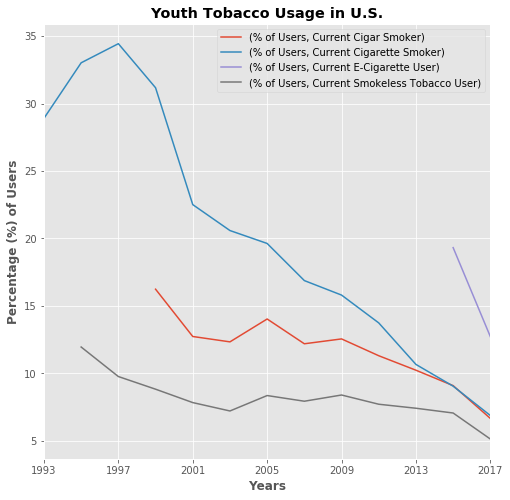

In [58]:
# Line graph creation for all youth tobacco usage in the US by TYPE of use
USA[['% of Users']]=USA[['% of Users']].astype(float)
smoking_by_type = USA.groupby(['Year','Frequency']).mean()
fig, ax = plt.subplots(figsize=(8,8))
smoking_by_type.unstack().plot(ax=ax)
plt.title("Youth Tobacco Usage in U.S.", weight = "bold")
plt.xlabel("Years", weight = 'bold')
plt.ylabel("Percentage (%) of Users", weight = 'bold')
leg = ax.legend()

In [59]:
# grouping by year, frequency and percentage of users from the USA dataframe. 
smoking_by_type = USA.groupby(['Year','Frequency']).mean()
smoking_by_type

% of Users
Year Frequency                                 
1993 Current Cigarette Smoker         28.905208
1995 Current Cigarette Smoker         33.020370
     Current Smokeless Tobacco User   11.957895
1997 Current Cigarette Smoker         34.436364
     Current Smokeless Tobacco User    9.770833
1999 Current Cigar Smoker             16.243478
     Current Cigarette Smoker         31.172358
     Current Smokeless Tobacco User    8.832710
2001 Current Cigar Smoker             12.737500
     Current Cigarette Smoker         22.510588
     Current Smokeless Tobacco User    7.839610
2003 Current Cigar Smoker             12.339459
     Current Cigarette Smoker         20.589423
     Current Smokeless Tobacco User    7.218227
2005 Current Cigar Smoker             14.034197
     Current Cigarette Smoker         19.631939
     Current Smokeless Tobacco User    8.361304
2007 Current Cigar Smoker             12.197951
     Current Cigarette Smoker         16.880503
     Current Smokeless Tobacco User    7.940511
2009 Current Cigar Smoker             12.558305
     Current Cigarette Smoker         15.806479
     Current Smokeless Tobacco User    8.401471
2011 Current Cigar Smoker             11.311709
     Current Cigarette Smoker         13.743583
     Current Smokeless Tobacco User    7.717714
2013 Current Cigar Smoker             10.238122
     Current Cigarette Smoker         10.667407
     Current Smokeless Tobacco User    7.420681
2015 Current Cigar Smoker              9.096166
     Current Cigarette Smoker          9.054875
     Current E-Cigarette User         19.322189
     Current Smokeless Tobacco User    7.066774
2017 Current Cigar Smoker              6.665854
     Current Cigarette Smoker          6.881748
     Current E-Cigarette User         12.726158
     Current Smokeless Tobacco User    5.138710

### VISUAL 11: Boxplot for Comparing Means for E-Cig All Usage by Gender in USA: ANOVA Test Performed

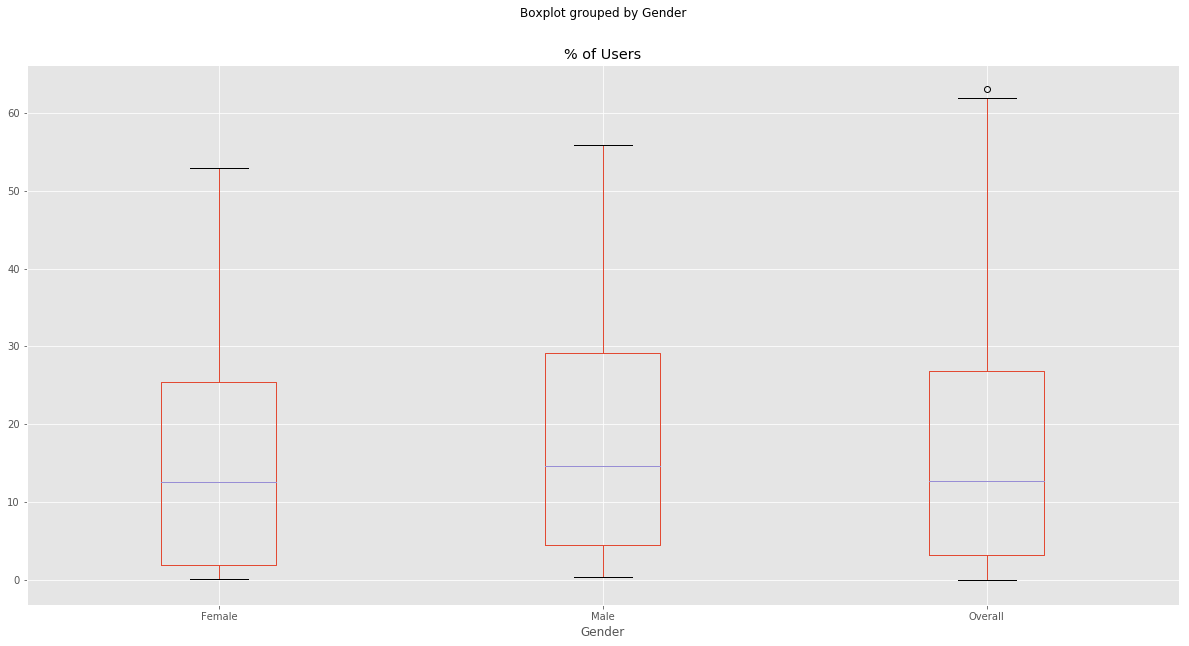

In [60]:
# Create a boxplot to compare means for E-Cig all Usage by Gender all over USA
USA_eCig.boxplot("% of Users", by="Gender", figsize=(20, 10))

#### We Learned:  That the  inclusing of an overall category in the case of gender reduced the value of the testing we were performing

In [61]:
# Extract individual groups
group1 = USA_eCig[USA_eCig["Gender"] == "Female"]["% of Users"]
group2 = USA_eCig[USA_eCig["Gender"] == "Male"]["% of Users"]
group3 = USA_eCig[USA_eCig["Gender"] == "Overall"]["% of Users"]

In [62]:
# Perform the ANOVA
#A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=2.3456118386558877, pvalue=0.09604548673887592)

In [63]:
# Create a boxplot to compare means for E-Cig Usage in 2015 & 2017 all over USA
USA_eCig_2015_17=USA_eCig.loc[(USA_eCig["Year"] =="2017")|(USA_eCig["Year"] =="2015")]

USA_eCig_2015_17.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
41,NC,2015,North Carolina,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,63.0,429,Overall,All Ages,Multiple Race,Ever,High School,"{'type': 'Point', 'coordinates': [-79.15925046..."
61,FL,2015,Florida,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.9,5752,Overall,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-81.92896053..."
89,NY,2015,New York,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,4.8,2095,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
107,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,7.4,362,Overall,All Ages,African American,Ever,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."
133,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,0.8,365,Overall,All Ages,African American,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."


### VISUAL 12: Boxplot of Percentage of Users Grouped by Year: ANOVA Test Performed

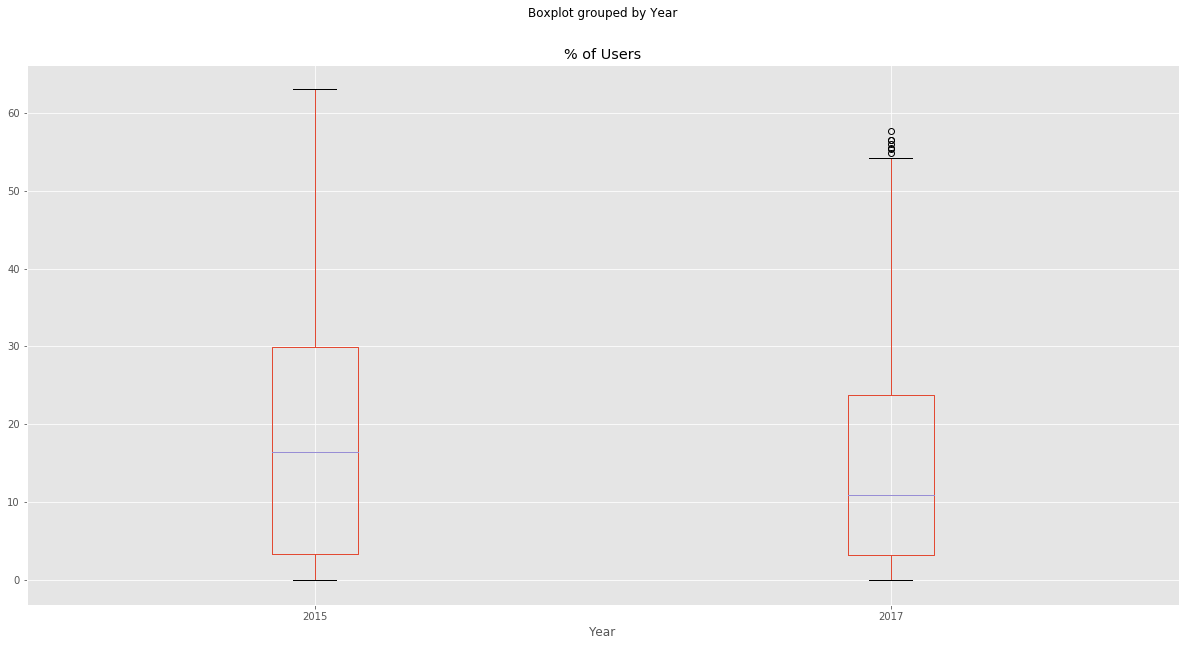

In [64]:
# Extract individual groups
USA_eCig_2015_17.boxplot("% of Users", by="Year", figsize=(20, 10))

In [65]:
# Extract individual groups
group1 = USA_eCig[USA_eCig["Year"] == "2015"]["% of Users"]
group2 = USA_eCig[USA_eCig["Year"] == "2017"]["% of Users"]

In [66]:
# Perform the ANOVA
#A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
stats.f_oneway(group1, group2)

F_onewayResult(statistic=19.592862428443475, pvalue=1.0085446000656468e-05)

### VISUAL 13: Boxplot of Percentage of Users Grouped by Gender: ANOVA Test Performed
                   #(removed All Gender category from earlier visual)

In [67]:
USA_eCig_MF=USA_eCig.loc[(USA_eCig["Gender"] =="Female")|(USA_eCig["Gender"] =="Male")]

USA_eCig_MF

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
979,MD,2015,Maryland,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,0.6,12888,Female,All Ages,All Races,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-76.60926011..."
1057,DC,2015,District of Columbia,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,6.4,4013,Male,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-77.03196112..."
1120,TN,2015,Tennessee,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,24.2,1931,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-85.77449091..."
1127,DC,2015,District of Columbia,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,0.3,4237,Female,All Ages,All Races,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-77.03196112..."
1133,MD,2015,Maryland,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,37.0,27030,Female,All Ages,All Races,Ever,High School,"{'type': 'Point', 'coordinates': [-76.60926011..."
1170,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,7.4,6724,Male,All Ages,All Races,Ever,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."
1264,MD,2015,Maryland,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,15.9,12840,Male,All Ages,All Races,Ever,Middle School,"{'type': 'Point', 'coordinates': [-76.60926011..."
1364,WV,2015,West Virginia,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,1.0,909,Female,All Ages,All Races,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-80.71264013..."
1592,SD,2015,South Dakota,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,1.6,660,Female,All Ages,All Races,Frequent,High School,"{'type': 'Point', 'coordinates': [-100.3735306..."
1677,AL,2015,Alabama,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,26.5,786,Male,All Ages,All Races,Current,High School,"{'type': 'Point', 'coordinates': [-86.63186076..."


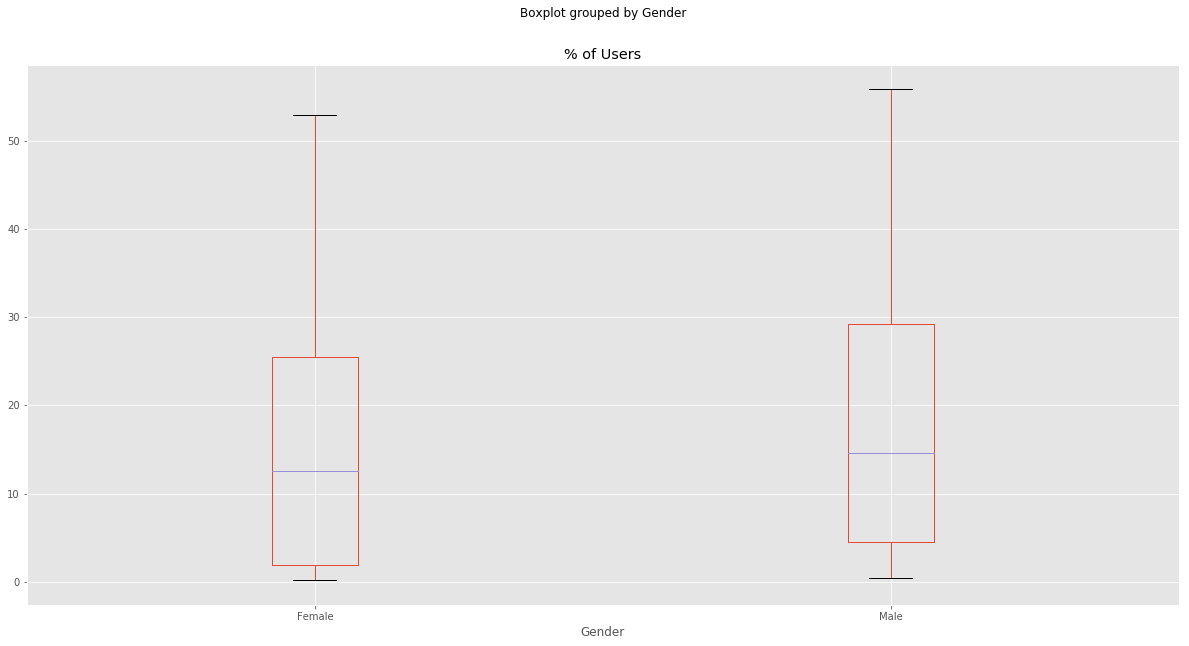

In [68]:
# Create a boxplot to compare means for E-Cig all Usage by Gender all over USA
USA_eCig_MF.boxplot("% of Users", by="Gender", figsize=(20, 10))

In [69]:
# Extract individual groups
group1 = USA_eCig[USA_eCig["Gender"] == "Female"]["% of Users"]
group2 = USA_eCig[USA_eCig["Gender"] == "Male"]["% of Users"]

In [70]:
# Perform the ANOVA
#A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
stats.f_oneway(group1, group2)

F_onewayResult(statistic=4.616410762730868, pvalue=0.032083628905618916)

###  VISUAL 14: Boxplot of Percentage of E-Cig Users in 2015 - 2017: ANOVA Test Performed

In [71]:
# Create a boxplot to compare means for E-Cig Usage in 2015 & 2017 all over USA
USA_eCig_2015_17=USA_eCig.loc[(USA_eCig["Year"] =="2017")|(USA_eCig["Year"] =="2015")]

USA_eCig_2015_17.head()

,Location Code,Year,State,Use Type,Status,Frequency,% of Users,Sample Size,Gender,Age,Race,User Status,Education,geolocation
41,NC,2015,North Carolina,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,63.0,429,Overall,All Ages,Multiple Race,Ever,High School,"{'type': 'Point', 'coordinates': [-79.15925046..."
61,FL,2015,Florida,E-Cigarette Use (Youth),User Status,Current E-Cigarette User,9.9,5752,Overall,All Ages,All Races,Current,Middle School,"{'type': 'Point', 'coordinates': [-81.92896053..."
89,NY,2015,New York,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,4.8,2095,Overall,All Ages,White,Frequent,High School,"{'type': 'Point', 'coordinates': [-75.54397042..."
107,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Ever E-Cigarette User,7.4,362,Overall,All Ages,African American,Ever,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."
133,VT,2015,Vermont,E-Cigarette Use (Youth),User Status,Frequent E-Cigarette User,0.8,365,Overall,All Ages,African American,Frequent,Middle School,"{'type': 'Point', 'coordinates': [-72.51764079..."


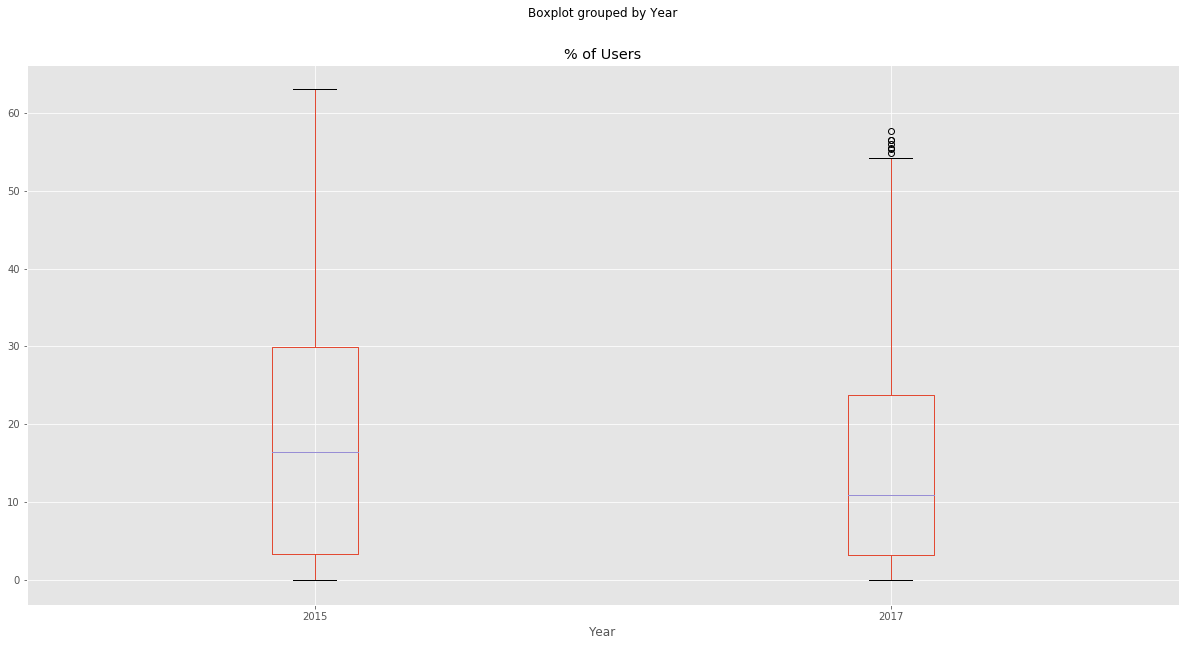

In [72]:
# Extract individual groups
USA_eCig_2015_17.boxplot("% of Users", by="Year", figsize=(20, 10))

In [73]:
# Extract individual groups
group1 = USA_eCig[USA_eCig["Year"] == "2015"]["% of Users"]
group2 = USA_eCig[USA_eCig["Year"] == "2017"]["% of Users"]

In [74]:
# Perform the ANOVA
#A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
stats.f_oneway(group1, group2)

F_onewayResult(statistic=19.592862428443475, pvalue=1.0085446000656468e-05)

### VISUAL 15: Boxplot for Validating the Ethnicity Differences for 2015 - 2017

In [75]:
USA_eCig_Ethnicity_Minus_All_Races=USA_eCig.loc[USA_eCig["Race"] != "All Races"]
USA_eCig_Ethnicity_Minus_All_Races.head

<bound method NDFrame.head of       Location Code  Year                 State                 Use Type  \
41               NC  2015        North Carolina  E-Cigarette Use (Youth)   
89               NY  2015              New York  E-Cigarette Use (Youth)   
107              VT  2015               Vermont  E-Cigarette Use (Youth)   
133              VT  2015               Vermont  E-Cigarette Use (Youth)   
139              MS  2015           Mississippi  E-Cigarette Use (Youth)   
238              ND  2015          North Dakota  E-Cigarette Use (Youth)   
275              WY  2015               Wyoming  E-Cigarette Use (Youth)   
386              VT  2015               Vermont  E-Cigarette Use (Youth)   
387              RI  2015          Rhode Island  E-Cigarette Use (Youth)   
429              FL  2015               Florida  E-Cigarette Use (Youth)   
434              NY  2015              New York  E-Cigarette Use (Youth)   
598              DC  2015  District of Columbia  E-Cigaret

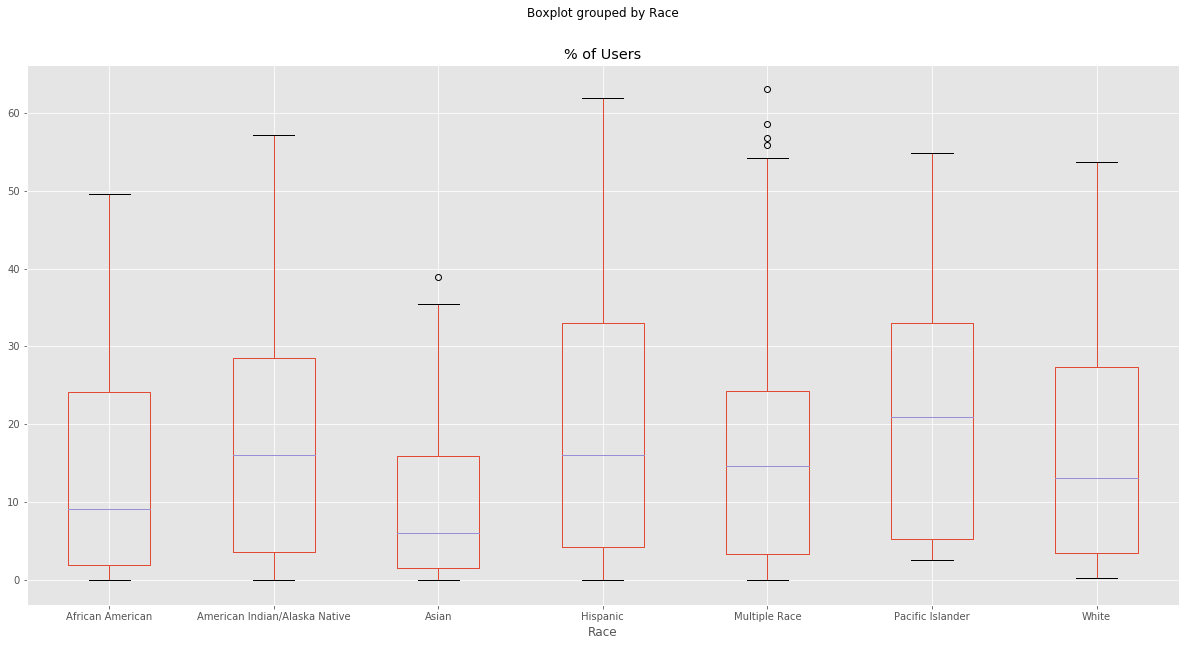

In [76]:
# Extract individual groups
USA_eCig_Ethnicity_Minus_All_Races.boxplot("% of Users", by="Race", figsize=(20, 10))

In [77]:
# Extract individual groups
group1 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "African American"]["% of Users"]
group2 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "American Indian/Alaska Native"]["% of Users"]
group3 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "Asian"]["% of Users"]
group4 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "Hispanic"]["% of Users"]
group5 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "Multiple Race"]["% of Users"]
group6 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "Pacific Islander"]["% of Users"]
group7 = USA_eCig_Ethnicity_Minus_All_Races[USA_eCig_Ethnicity_Minus_All_Races["Race"] == "White"]["% of Users"]

In [78]:
# Perform the ANOVA
#A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
stats.f_oneway(group1, group2,group3,group4,group5,group6,group7)

F_onewayResult(statistic=8.341396710514884, pvalue=7.123927431358914e-09)

#### T-Tests for Cigarette (1993 vs. 2017 & 2015 vs. 2017), Smokeless Tobacco (1995 vs. 2017 & 2015 vs. 2017), and Cigars (1999 vs. 2017 & 2015 vs. 2017) Usage

In [79]:
USA = USA.rename(columns={"% of Users":"Users"})
USA.head()

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,User Status,Education
1,WY,1999,Wyoming,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,34.6,747,Male,All Ages,All Races,Current,High School
2,DE,2009,Delaware,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.3,1791,Female,All Ages,All Races,Current,Middle School
5,MS,2001,Mississippi,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,14.3,808,Overall,All Ages,African American,Current,Middle School
6,VT,2005,Vermont,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,20.8,127,Overall,All Ages,African American,Current,High School
9,ID,2013,Idaho,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,8.2,1360,Overall,All Ages,White,Current,High School


In [80]:
USA_Use = USA.loc[USA["Use Type"] =="Cigarette Use (Youth)"]
USA_Gender = USA_Use.loc[USA_Use["Gender"] =="Overall"]
USA_Race = USA_Gender.loc[USA_Gender["Race"] =="All Races"]
USA_User = USA_Race.loc[USA_Race["Frequency"] =="Current Cigarette Smoker"]
USA_1993 = USA_User.loc[USA_User["Year"] =="1993"]
USA_1993.head()

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,User Status,Education
26,MT,1993,Montana,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,30.7,2424,Overall,All Ages,All Races,Current,High School
435,TN,1993,Tennessee,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,35.3,3142,Overall,All Ages,All Races,Current,High School
853,MS,1993,Mississippi,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,27.6,1348,Overall,All Ages,All Races,Current,High School
1342,IL,1993,Illinois,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,29.1,3859,Overall,All Ages,All Races,Current,High School
2639,WV,1993,West Virginia,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,38.9,2740,Overall,All Ages,All Races,Current,High School


In [81]:
USA_2017 = USA_User.loc[USA_User["Year"] =="2017"]
USA_2017.head()

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,User Status,Education
21044,NM,2017,New Mexico,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,10.6,5553,Overall,All Ages,All Races,Current,High School
21097,KY,2017,Kentucky,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,14.3,1898,Overall,All Ages,All Races,Current,High School
21125,CT,2017,Connecticut,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.9,2404,Overall,All Ages,All Races,Current,High School
21128,NH,2017,New Hampshire,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,7.8,11910,Overall,All Ages,All Races,Current,High School
21463,MD,2017,Maryland,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,8.2,50735,Overall,All Ages,All Races,Current,High School


In [82]:
USA_2015 = USA_User.loc[USA_User["Year"] =="2015"]
USA_2015.head()

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,User Status,Education
371,PA,2015,Pennsylvania,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,12.9,2775,Overall,All Ages,All Races,Current,High School
1105,AL,2015,Alabama,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,14.0,1444,Overall,All Ages,All Races,Current,High School
1181,HI,2015,Hawaii,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,5.0,6232,Overall,All Ages,All Races,Current,Middle School
2224,MD,2015,Maryland,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,2.5,26100,Overall,All Ages,All Races,Current,Middle School
2730,MT,2015,Montana,Cigarette Use (Youth),Smoking Status,Current Cigarette Smoker,13.1,4333,Overall,All Ages,All Races,Current,High School


In [83]:
# Calculate the population mean Cigarettes 1993
population1 = USA_1993[USA_1993["Gender"] == "Overall"]
population1.Users.mean()

30.310526315789474

In [84]:
# Calculate the population mean Cigarettes 2017
population2 = USA_2017[USA_2017["Gender"] == "Overall"]
population2.Users.mean()

7.212962962962963

In [85]:
# Calculate the population mean Cigarettes 2015
population3 = USA_2015[USA_2015["Gender"] == "Overall"]
population3.Users.mean()

9.176000000000002

In [86]:
# Calculate Independent (Two Sample) T-Test
# Cigarette Smokers 1993 vs. 2017
stats.ttest_ind(population1.Users, population2.Users, equal_var=False)

Ttest_indResult(statistic=18.878113070078, pvalue=2.465517886225572e-16)

In [87]:
# Calculate Independent (Two Sample) T-Test
# Cigarette Smokers 2015 vs. 2017
stats.ttest_ind(population2.Users, population3.Users, equal_var=False)

Ttest_indResult(statistic=-2.527876970380149, pvalue=0.013113123682108228)

In [88]:
#Smokeless Tobacco
USA_ST = USA.loc[USA["Frequency"] =="Current Smokeless Tobacco User"]
USA_ST1995 = USA_ST.loc[USA_ST["Year"] =="1995"]
USA_ST1995.head()

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,User Status,Education
166,AL,1995,Alabama,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,21.5,1810,Male,All Ages,All Races,Current,High School
803,HI,1995,Hawaii,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,1.3,664,Female,All Ages,All Races,Current,High School
1308,ME,1995,Maine,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,9.0,1374,Overall,All Ages,All Races,Current,High School
1642,UT,1995,Utah,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,8.9,121,Overall,All Ages,Hispanic,Current,High School
1781,UT,1995,Utah,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,6.5,2831,Overall,All Ages,White,Current,High School


In [89]:
#ST 2017
USA_ST2017 = USA_ST.loc[USA_ST["Year"] =="2017"]
USA_STGEN17 = USA_ST2017.loc[USA_ST2017["Gender"] =="Overall"]
USA_STRace17 = USA_STGEN17.loc[USA_STGEN17["Race"] =="All Races"]
USA_STRace17.head()

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,User Status,Education
21063,VT,2017,Vermont,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,5.2,20473,Overall,All Ages,All Races,Current,High School
21081,OK,2017,Oklahoma,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,9.2,1596,Overall,All Ages,All Races,Current,High School
21261,DE,2017,Delaware,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,3.5,2840,Overall,All Ages,All Races,Current,High School
21375,NY,2017,New York,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,4.6,11127,Overall,All Ages,All Races,Current,High School
21497,KS,2017,Kansas,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,5.3,2397,Overall,All Ages,All Races,Current,High School


In [90]:
#Smokelesstobacco Users 1999
USA_ST1995 = USA_ST1995[USA_ST1995["Gender"] == "Overall"]
USA_ST1995.Users.mean()

11.350877192982459

In [91]:
#Smokelesstobacco Users 2017
populationST17 = USA_STRace17[USA_STRace17["Gender"] == "Overall"]
populationST17.Users.mean()

5.40909090909091

In [92]:
# Calculate Independent (Two Sample) T-Test
# Smokeless Tobacco Users 1995 vs. 2017
stats.ttest_ind(USA_ST1995.Users, populationST17.Users, equal_var=False)

Ttest_indResult(statistic=5.585559425695885, pvalue=3.319213425531006e-07)

In [93]:
#ST 2015
USA_ST2015 = USA_ST.loc[USA_ST["Year"] =="2015"]
USA_STGEN15 = USA_ST2015.loc[USA_ST2015["Gender"] =="Overall"]
USA_STRace15 = USA_STGEN15.loc[USA_STGEN15["Race"] =="All Races"]
USA_STRace15.head()

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,User Status,Education
806,NM,2015,New Mexico,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,3.1,3091,Overall,All Ages,All Races,Current,Middle School
1043,WV,2015,West Virginia,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,13.4,1604,Overall,All Ages,All Races,Current,High School
2812,NM,2015,New Mexico,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,8.7,8271,Overall,All Ages,All Races,Current,High School
3203,CA,2015,California,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,3.0,1728,Overall,All Ages,All Races,Current,High School
4279,VT,2015,Vermont,Smokeless Tobacco Use (Youth),User Status,Current Smokeless Tobacco User,2.0,13543,Overall,All Ages,All Races,Current,Middle School


In [94]:
populationST15 = USA_STRace15[USA_STRace15["Gender"] == "Overall"]
populationST15.Users.mean()

7.206818181818182

In [95]:
# Calculate Independent (Two Sample) T-Test
# Smokeless Tobacco Users 2015 vs 2017
stats.ttest_ind(populationST17.Users, populationST15.Users, equal_var=False)

Ttest_indResult(statistic=-2.581379851062646, pvalue=0.011598936598046127)

In [96]:
#Cigar Usage
USA_Cigar = USA.loc[USA["Frequency"] =="Current Cigar Smoker"]
USA_CigGen99 = USA_Cigar.loc[USA_Cigar["Gender"] =="Overall"]
USA_CigRace99 = USA_CigGen99.loc[USA_CigGen99["Race"] =="All Races"]
USA_Cigar1999 = USA_CigRace99.loc[USA_CigRace99["Year"] =="1999"]
USA_Cigar1999.head()

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,User Status,Education
1288,MT,1999,Montana,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,20.4,2906,Overall,All Ages,All Races,Current,High School
1789,AL,1999,Alabama,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,19.3,2089,Overall,All Ages,All Races,Current,High School
3092,UT,1999,Utah,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,7.0,1508,Overall,All Ages,All Races,Current,High School
5365,WI,1999,Wisconsin,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,18.2,1333,Overall,All Ages,All Races,Current,High School
5606,OH,1999,Ohio,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,24.5,2054,Overall,All Ages,All Races,Current,High School


In [97]:
USA_Cigar2017 = USA_CigRace99.loc[USA_CigRace99["Year"] =="2017"]
USA_Cigar2017.head()

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,User Status,Education
21176,ND,2017,North Dakota,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,2.0,2378,Overall,All Ages,All Races,Current,Middle School
21179,VA,2017,Virginia,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,1.9,2524,Overall,All Ages,All Races,Current,Middle School
21348,SC,2017,South Carolina,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,10.8,1458,Overall,All Ages,All Races,Current,High School
21368,WV,2017,West Virginia,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,11.4,1538,Overall,All Ages,All Races,Current,High School
21402,RI,2017,Rhode Island,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,2.2,1472,Overall,All Ages,All Races,Current,Middle School


In [98]:
#Cigar Smokers 1999
population99 = USA_Cigar1999[USA_Cigar1999["Gender"] == "Overall"]
population99.Users.mean()

16.7952380952381

In [99]:
#Cigar Smokers 2017
population17 = USA_Cigar2017[USA_Cigar2017["Gender"] == "Overall"]
population17.Users.mean()

6.832608695652172

In [100]:
# Calculate Independent (Two Sample) T-Test
# Cigars Users 1999 vs 2017
stats.ttest_ind(population17.Users, population99.Users, equal_var=False)

Ttest_indResult(statistic=-8.333945671415941, pvalue=4.0314993351419694e-09)

In [101]:
USA_Cigar2015 = USA_CigRace99.loc[USA_CigRace99["Year"] =="2015"]
USA_Cigar2015.head()

,Location Code,Year,State,Use Type,Status,Frequency,Users,Sample Size,Gender,Age,Race,User Status,Education
409,MD,2015,Maryland,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,10.3,54795,Overall,All Ages,All Races,Current,High School
492,MS,2015,Mississippi,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,16.5,2144,Overall,All Ages,All Races,Current,High School
1010,PA,2015,Pennsylvania,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,12.5,2860,Overall,All Ages,All Races,Current,High School
1828,MA,2015,Massachusetts,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,10.4,3098,Overall,All Ages,All Races,Current,High School
1899,VT,2015,Vermont,Cigar Use (Youth),Smoking Status,Current Cigar Smoker,10.4,20934,Overall,All Ages,All Races,Current,High School


In [102]:
populationcigar15 = USA_Cigar2015[USA_Cigar2015["Gender"] == "Overall"]
populationcigar15.Users.mean()

8.854545454545454

In [103]:
# Calculate Independent (Two Sample) T-Test
# Cigars Users 2015 vs 2017
stats.ttest_ind(population17.Users, populationcigar15.Users, equal_var=False)

Ttest_indResult(statistic=-2.662551529657273, pvalue=0.00927173587213017)

## CONCLUSION:

### Our conclusions for all measures and values demonstrated a clear downward trend line with a small increase in 2015, in which the tracking of e-cigarettes began for our data.  We could not find statistical proof of the 900% increase mentioned in the TED talk from our data.  

### However, we do believe that if we repeated this study when the 2019 data is released for this survey, the conclusion would most likely change.  

### It would also be of value, to pull other survey’s from the CDC as well as other health data sources, to compare all the values and track the impact of the introduction of e-cigarettes on the health of teens now as well as the impact of these same individuals as they age.   However, we needed to focus on the study of our one dataset for this project, so we could complete the work in time. 
